# IDEA:

Now we want group by the df for the users, in order to have 5 df one for each user 
In order to build our NN

In [1]:
# we recall our df after the clustering procedure
%store -r merge_unique_df

In [2]:
merge_unique_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27207 entries, -twistin'-White Silver SandsBill Black's Combo to Zunga ZengK7
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Performer                      27207 non-null  object 
 1   Song                           27207 non-null  object 
 2   spotify_genre                  27207 non-null  object 
 3   spotify_track_duration_minute  27207 non-null  float64
 4   spotify_track_explicit         27207 non-null  object 
 5   spotify_track_album            27207 non-null  object 
 6   danceability                   27207 non-null  float64
 7   energy                         27207 non-null  float64
 8   key                            27207 non-null  float64
 9   loudness                       27207 non-null  float64
 10  mode                           27207 non-null  float64
 11  speechiness                    27207 non-null  float64
 12 

In [ ]:
# i want to rename the column Cluster --> WILL BE OUR USER 
merge_unique_df.rename(columns={'cluster':'User'},inplace=True)
merge_unique_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27207 entries, -twistin'-White Silver SandsBill Black's Combo to Zunga ZengK7
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Performer                      27207 non-null  object 
 1   Song                           27207 non-null  object 
 2   spotify_genre                  27207 non-null  object 
 3   spotify_track_duration_minute  27207 non-null  float64
 4   spotify_track_explicit         27207 non-null  object 
 5   spotify_track_album            27207 non-null  object 
 6   danceability                   27207 non-null  float64
 7   energy                         27207 non-null  float64
 8   key                            27207 non-null  float64
 9   loudness                       27207 non-null  float64
 10  mode                           27207 non-null  float64
 11  speechiness                    27207 non-null  float64
 12 

In [ ]:
# to see wich feature consider in the model 
merge_unique_df.columns

Index(['Performer', 'Song', 'spotify_genre', 'spotify_track_duration_minute',
       'spotify_track_explicit', 'spotify_track_album', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'spotify_track_popularity', 'maingenere', 'User'],
      dtype='object')

In [5]:
merge_unique_df.shape

(27207, 21)

In [ ]:
# to verify that we don't have Nan value after the marge
merge_unique_df.isnull().sum()

Performer                        0
Song                             0
spotify_genre                    0
spotify_track_duration_minute    0
spotify_track_explicit           0
spotify_track_album              0
danceability                     0
energy                           0
key                              0
loudness                         0
mode                             0
speechiness                      0
acousticness                     0
instrumentalness                 0
liveness                         0
valence                          0
tempo                            0
time_signature                   0
spotify_track_popularity         0
maingenere                       0
User                             0
dtype: int64

## Now we can try to develop our NN

In [ ]:
# package that we need
import keras
from keras.models import Sequential
# we most use sequential model -> one layer after the other (sequence of layer)
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import MeanAbsolutePercentageError


# non so se siano utili
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# essential
import numpy as np
import matplotlib.pyplot as plt


#RICORDARE DA INSTALLARE PEDROLLO 
#! pip install pydot

In [10]:
# fisrt we define the FEATURE of our model --> INPUT
feature=[    'spotify_track_duration_minute', 'danceability', 'energy', 'key', 'loudness',
    'mode', 'speechiness', 'acousticness', 'tempo', 'time_signature',
    'spotify_track_popularity', 'instrumentalness', 'liveness']
# now we have to define our TARGET (what we are interested in) --> OUTPUT
target='valence'

# we also define the USER, since we train the model dividing by users
user='User'

### USER 1 - Test


In [11]:
# first we have to obtain only the songs listen to the USER1
mask_user1=merge_unique_df['User']==1
user1_df=merge_unique_df[mask_user1]
user1_df.shape

(4669, 21)

In [12]:
user1_df.User.unique()

array([1], dtype=int32)

In [ ]:
# we obtain the user1 subset
user1_df.head(3)

,Performer,Song,spotify_genre,spotify_track_duration_minute,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,maingenere,User
SongID,,,,,,,,,,,,,,,,,,,,,
'65 Love AffairPaul Davis,Paul Davis,'65 Love Affair,"['album rock', 'bubblegum pop', 'country rock'...",3.66,False,Radio Hits Of the '80s,0.647,0.686,2.0,-4.247,...,0.0274,0.4320,0.000006,0.1330,0.952,155.697,4.0,40.0,rock,1
'til I Can Make It On My OwnTammy Wynette,Tammy Wynette,'til I Can Make It On My Own,"['country', 'country dawn', 'nashville sound']",3.03,False,The Essential Tammy Wynette,0.450,0.294,7.0,-12.022,...,0.0318,0.8320,0.000035,0.1080,0.146,141.148,4.0,31.0,country,1
'Til My Baby Comes HomeLuther Vandross,Luther Vandross,'Til My Baby Comes Home,"['funk', 'motown', 'neo soul', 'new jack swing...",5.54,False,The Night I Fell In Love,0.804,0.714,11.0,-6.714,...,0.1830,0.0567,0.000006,0.0253,0.802,139.663,4.0,29.0,soul,1


In [18]:
# now we estract the FEATURE
x=user1_df[feature]
#x.columns

# and the TARGET
y=user1_df[target]
#y

In [21]:
# NON RICORDO SE AVESSIMO GIA' NORMALIZZATO --> LO FACCIO NEL CASO QUESTO SARA' DA CONTOLLARE
# HO SICURAMENTE STANDARDIZZATO QUANDO HO FATTO CLUSTER --> MA SE NON RICORDO MALE ABBIAMO UNITO IL DF ORIGINALE CON SOLO COLONNA USER
# QUINDI DOVREBBE AVER SENSO NORMALIZZARE --> COMUNQUE DA VEDERE MEGLIO 

scaler=StandardScaler()

x_scaled=scaler.fit_transform(x)

In [22]:
# now we divide the df in test and train 
# necessary in order test our results after the application of the model
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [24]:
# for keras we need to convert y_train and y_test in Numpy array 
y_train=np.array(y_train)
y_test=np.array(y_test)

#before apply the model we need to verify the shape of this array

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3735, 13), (934, 13), (3735,), (934,))

In [ ]:
x_train.shape[1]

13

In [ ]:
# are 13 as the number of input that we have to insert in the input_dim --> only in the first layer
x.columns

Index(['spotify_track_duration_minute', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'tempo',
       'time_signature', 'spotify_track_popularity', 'instrumentalness',
       'liveness'],
      dtype='object')

In [39]:
# NOW WE CAN TRY TO APPLY OUR NN (LINEAR)
model_user1=Sequential([
    Dense(64,input_dim=x_train.shape[1],activation='relu',name='first_layer'),
    # 64 as the number of initial layer is a common choice when we build a NN --> VEDIAMO COME FUNZIA POI NEL CASO SI SISTEMA IN SEGUITO
    # input_dim: take the dimension of the x_train array --> that is equivalent to the number of feature in input
    
    # SI POSSONO AGGIUNGERE PER OGNI LAYER --> Dropout(0.3) per evitare overfitting
    

    Dense(32,activation='relu',name='secod_layer'),
    Dense(1,activation='linear',name='final_layer')
])

c:\Users\lovoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
# Now we try to compile the model
model_user1.compile(optimizer='adam',loss='mse',metrics=['mae'])

#now see some results
model_user1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ first_layer (Dense)             │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ secod_layer (Dense)             │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ final_layer (Dense)             │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Now we can train our model
history_model_user1=model_user1.fit(
    x_train,y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    verbose=1
)

Epoch 1/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3013 - mae: 0.4231 - val_loss: 0.0607 - val_mae: 0.1891
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0482 - mae: 0.1757 - val_loss: 0.0463 - val_mae: 0.1693
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0339 - mae: 0.1469 - val_loss: 0.0422 - val_mae: 0.1617
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0317 - mae: 0.1432 - val_loss: 0.0377 - val_mae: 0.1542
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0289 - mae: 0.1383 - val_loss: 0.0381 - val_mae: 0.1524
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0274 - mae: 0.1326 - val_loss: 0.0357 - val_mae: 0.1481
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0271 - mae: 0.1318 - val_loss: 0.0336 - val_mae: 0.1446
Epoch 8/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0262 - mae: 0.1306 - val_loss: 0.0342 - val_mae: 0.1455
Epoch 9/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0246 - mae: 

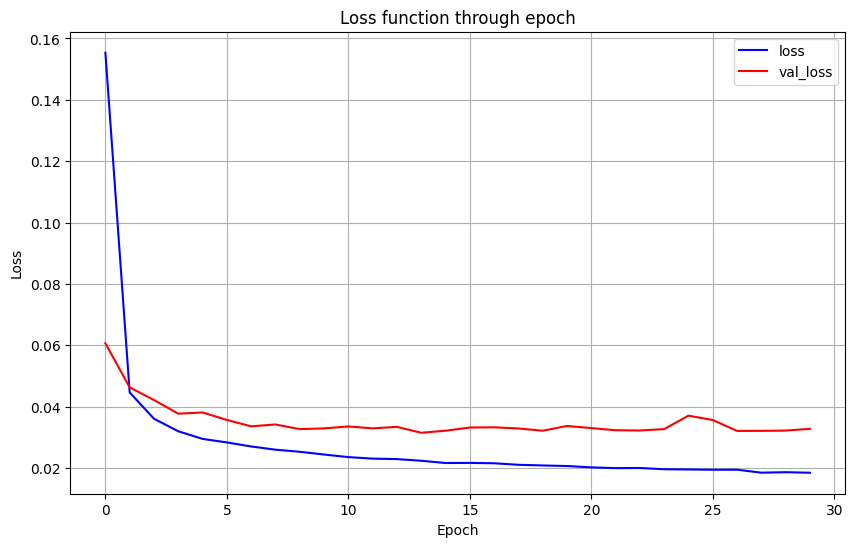

In [51]:
# we can try to perform some plots
plt.figure(figsize=(10,6))
plt.plot(history_model_user1.history['loss'],color='blue',label='loss')
plt.plot(history_model_user1.history['val_loss'],color='red',label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss function through epoch')
plt.legend()
plt.grid()
plt.show()

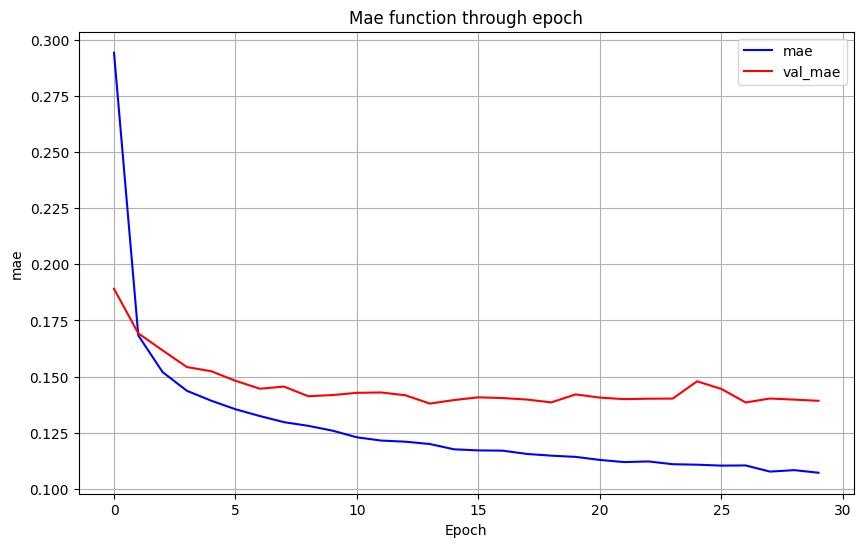

In [49]:
plt.figure(figsize=(10,6))
plt.plot(history_model_user1.history['mae'],color='blue',label='mae')
plt.plot(history_model_user1.history['val_mae'],color='red',label='val_mae')
plt.xlabel('Epoch')
plt.ylabel('mae')
plt.title('Mae function through epoch')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# keras.utils.plot_model( model, show_shapes=True)
keras.utils.plot_model(model_user1,show_shapes=True)

# non mi plotta nulla --> da rivedere perchè non avevo pacchetto installato 

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [42]:
# now we can evaluate the test data

test_loss, test_mae = model_user1.evaluate(x_test,y_test,verbose=1)

test_loss,test_mae

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0282 - mae: 0.1313


(0.029393326491117477, 0.1340172290802002)